In [183]:
import pandas as pd
import numpy as np


In [184]:
import chardet

# Use chardet to detect the encoding
with open("Elon_musk.csv", "rb") as f:
    result = chardet.detect(f.read())
    encoding = result["encoding"]

# Read the CSV file using the detected encoding
df = pd.read_csv("Elon_musk.csv", encoding=encoding)

In [185]:
# data = pd.read_csv("Elon_musk.csv",encoding="Windows-1252")
data = df.copy()


In [186]:
# df = data.copy()
df

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


lets clean it up

In [187]:
# df.drop(["Unnamed:0"],inplace=True, axis=1)
todrop = df.columns[0]

In [188]:
df.drop(todrop,axis=1,inplace=True)

In [189]:
df

,Text
0,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


### Lets visualize the data

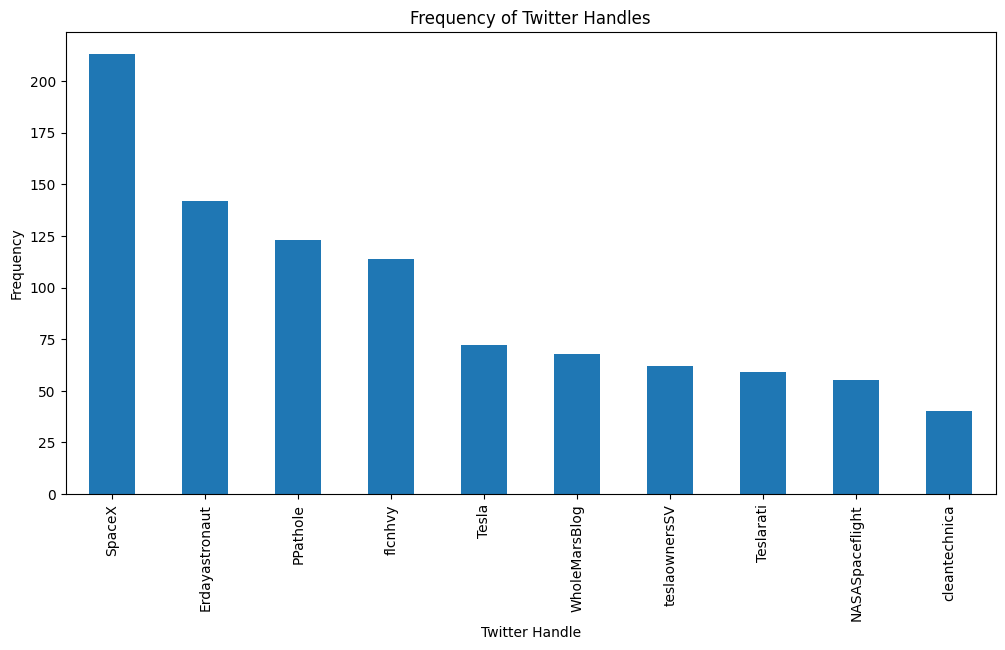

In [190]:
import matplotlib.pyplot as plt

# Regular expression pattern to extract Twitter handles
pattern = r'@(\w+)'

# Extract Twitter handles from the 'Text' column using regular expression
handles = df['Text'].str.findall(pattern).explode()
handle = pd.DataFrame(handles)

import matplotlib.pyplot as plt

# Count the frequency of each handle, here taking only top 10
handle_counts = handle.value_counts()[:10]

handle_counts.index = handle_counts.index.map(lambda x: x[0])

plt.figure(figsize=(12, 6))
handle_counts.plot(kind='bar')
plt.title('Frequency of Twitter Handles')
plt.xlabel('Twitter Handle')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()




In [191]:
import re
import string

def cleanit(s):
    # s = s.lower()
    s = s.lower()
    # s = re.sub('\[.*?\]', '', s)
    s = re.sub(r'@[\w.-]+', '', s)
    s = re.sub('[%s]' % re.escape(string.punctuation), '', s)
    s = re.sub('\w*\d\w*', '', s)
    s = re.sub("[0-9" "]+"," ",s)
    s = re.sub('[‘’“”…]', '', s)
    return s

clean = lambda x: cleanit(x)

df["Text"] = df["Text"].apply(cleanit) # Clean The Text
df.head(11)

,Text
0,im an alien
1,ray tracing on cyberpunk with hdr is nextleve...
2,great interview
3,doge is underestimated
4,congratulations tesla china for amazing execu...
5,happy new year of the ox
6,frodo was the underdoge\nall thought he would ...
7,haha thanks
8,indeed tweets definitely do not represent re...
9,the most entertaining outcome is the most likely


In [192]:
import matplotlib.pyplot as plt
import seaborn as sns

In [193]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [194]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(df["Text"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names_out(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
word_freq_df.head(11)
# vectorizer.get

,term,occurrences,frequency
0,aber,1,0.000097
1,able,6,0.000584
2,abo,1,0.000097
3,aboard,1,0.000097
4,abort,3,0.000292
5,absence,1,0.000097
6,absolute,1,0.000097
7,absolutely,15,0.001459
8,absorb,1,0.000097
9,absorption,1,0.000097


In [195]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(df["Text"])
names_features = vectorizer.get_feature_names_out()
dense = doc_vec.todense()
denselist = dense.tolist()
df1 = pd.DataFrame(denselist, columns = names_features)
df1

,able,abort,absolutely,absurd,acceptable,access,accurate,achieve,active,actual,...,yeah,year,years,yes,yesterdays,youd,youre,yup,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.404179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [196]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), max_features=2000).fit(corpus) #for tri-gram, put ngram_range=(3,3)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [197]:
df1.columns

Index(['able', 'abort', 'absolutely', 'absurd', 'acceptable', 'access',
       'accurate', 'achieve', 'active', 'actual',
       ...
       'yeah', 'year', 'years', 'yes', 'yesterdays', 'youd', 'youre', 'yup',
       'zero', 'zone'],
      dtype='object', length=1000)

In [198]:
top2_words = get_top_n2_words(df["Text"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns = ["Bi-gram", "Freq"]
top2_df.head(11)

,Bi-gram,Freq
0,rt falcon,17
1,pretty much,12
2,giga berlin,10
3,first stage,10
4,falcon first,9
5,coming soon,8
6,static fire,8
7,crew dragon,8
8,next year,7
9,falcon launch,7


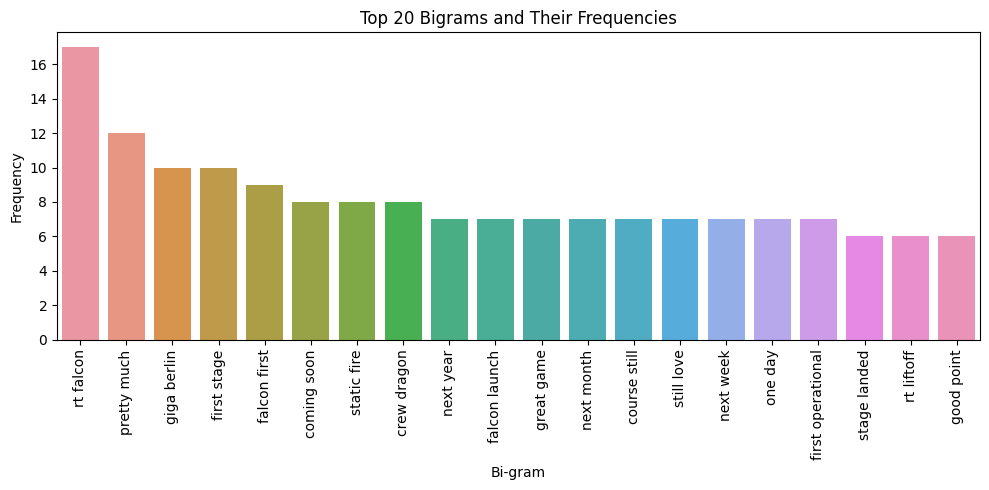

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns

top20_bigram = top2_df.iloc[0:20, :]

# Create the bar plot
plt.figure(figsize=(10, 5))
plot = sns.barplot(x=top20_bigram["Bi-gram"], y=top20_bigram["Freq"])

# Rotate x-axis labels
plot.set_xticklabels(rotation=90, labels=top20_bigram["Bi-gram"])

plt.xlabel("Bi-gram")
plt.ylabel("Frequency")
plt.title("Top 20 Bigrams and Their Frequencies")
plt.tight_layout()
plt.show()


In [200]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

# Adding Subjectivity & Polarity
df[["subjectivity", "polarity"]] = df.apply(sentiment_analysis, axis=1)
df.head(11)

,Text,subjectivity,polarity
0,im alien,0.750000,-0.250000
1,ray tracing cyberpunk hdr nextlevel tried,0.000000,0.000000
2,great interview,0.750000,0.800000
3,doge underestimated,0.000000,0.000000
4,congratulations tesla china amazing execution ...,0.322222,0.200000
5,happy new year ox,0.727273,0.468182
6,frodo underdoge thought would fail httpstcozgx...,0.300000,-0.500000
7,haha thanks,0.250000,0.200000
8,indeed tweets definitely represent realworld t...,0.500000,0.000000
9,entertaining outcome likely,0.850000,0.250000


In [201]:
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [202]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
# Create a New Analysis Column
df["analysis"] = df["polarity"].apply(analysis)

In [203]:
positive_df = df[df['analysis'] == 'Positive']
negative_df = df[df['analysis'] == 'Negative']

print('positive df')
for i, row in positive_df[:5].iterrows():
    print(' -' + row['Text'])

print('negative df')
for i, row in negative_df[:5].iterrows():
    print(' -' + row['Text'])

positive df
 -great interview
 -congratulations tesla china amazing execution last year next even
 -happy new year ox
 -haha thanks
 -entertaining outcome likely
negative df
 -im alien
 -frodo underdoge thought would fail httpstcozgxjfdzzrm
 -app sucks
 -starlink staggeringly difficult technical amp economic endeavor however
 -spacex needs pass deep chasm negative cash flow next year


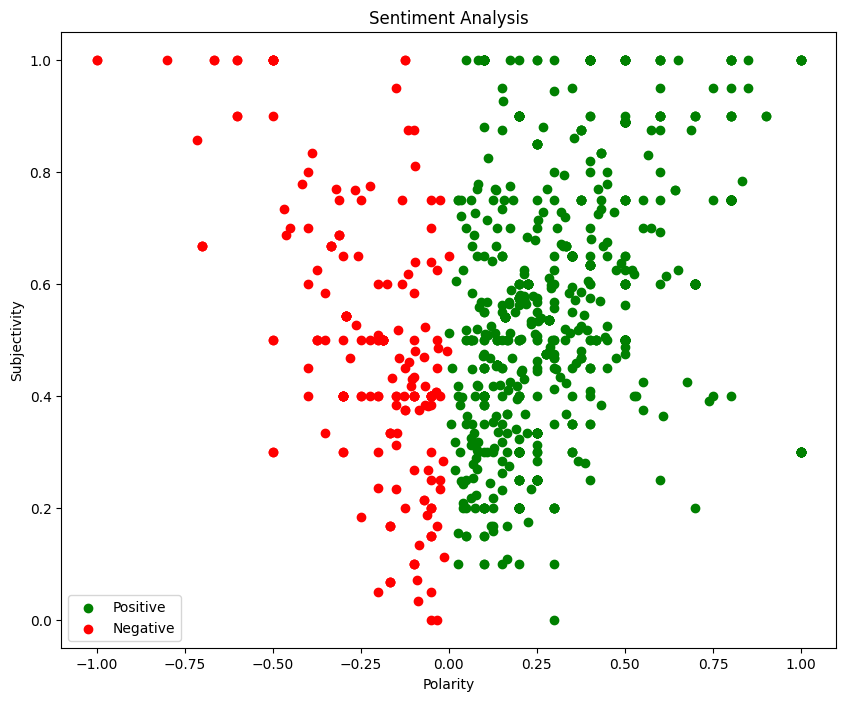

In [204]:
import matplotlib.pyplot as plt

# Scatter plot for sentiment analysis
plt.figure(figsize=(10, 8))
plt.scatter(positive_df["polarity"], positive_df["subjectivity"], color="green", label="Positive")
plt.scatter(negative_df["polarity"], negative_df["subjectivity"], color="red", label="Negative")
plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.legend()
plt.show()



So we visualized both the poisitives and negatives side by side on the same plot, as shown above.